# ID3 Algorithm

<img src="https://avatars0.githubusercontent.com/u/33459977?s=80&v=4" align="left"/>

---------------------------------------------------------------------------
About
=====

- **ARJUN MOHNOT**
- E17CSE102
- EB04
- Mobile: +91-7733993964
- [Website](https://arjun009.github.io)
- [WhatsApp](https://wa.me/917733993964?text=Hey%20Arjun%20Mohnot,%20I%27m%20contacting%20you%20from%20your%20Jupyter%20Notebook,%20A.I.-M.L.)
- [PlayStore](https://play.google.com/store/apps/developer?id=ARJUN+MOHNOT)

---------------------------------------------------------------------------

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
from collections import Counter

# Opening Dataframe

In [4]:
openFile=pd.read_csv("DatasetTwo.csv")


In [5]:
#Extract no. of features in the dataset through selected columns
colD=[i for i in openFile][2:] # do slicing here

#Printed list of column name will be considered for features
colD

['Branch', 'CGPA', 'Gamer', 'Movie_Fanatic', 'Committed?']

In [6]:
openFile

,Unnamed: 0,S.No,Branch,CGPA,Gamer,Movie_Fanatic,Committed?
0,0,1,CSE,High,Yes,No,No
1,1,2,CSE,Low,Yes,No,No
2,2,3,CSE,High,Yes,Yes,No
3,3,4,CSE,High,No,No,Yes
4,4,5,CSE,Low,No,Yes,Yes
5,5,6,ECE,Low,Yes,No,No
6,6,7,ECE,High,Yes,Yes,Yes
7,7,8,ECE,Low,Yes,Yes,No
8,8,9,ECE,High,Yes,Yes,Yes
9,9,10,ECE,High,No,Yes,Yes


In [7]:
#openFile[openFile['Outlook']=='Sunny']

# Entropy (Entropy(S) = ∑ – p(I) . log2p(I))

In [8]:
Yname=colD[-1]
def entropy(df,Yname=colD[-1]):
    
    dfDict=dict(Counter(df[Yname]))
    totalElements=sum(dfDict.values())
    entropy=0
    
    for i in dfDict:
        entropy-=(dfDict[i]/totalElements)*(np.log2(dfDict[i]/totalElements))
    if entropy==0:
        if len(dfDict)==1:
            entropy=str(list(dfDict.keys())[0])
    return entropy    
        


#entropyY=entropy(openFile[openFile['Outlook']=='Sunny'])
entropyY=entropy(openFile)

entropyY

0.9967916319816366

# Information Gain (Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ])

In [9]:
def gain(decision,feature):
    
    df=decision
    Xname=feature
    uniqueFields=df[Xname].unique().tolist()
    totalElements=len(df)
    #print("length",len(df))
    gainScore=0


    for i in uniqueFields:
        currentDf=df[df[Xname]==i]
        calculate=entropy(currentDf)
       
        if type(calculate)==str:
            pass
        else:
            gainScore+=(len(currentDf)/totalElements)*entropy(currentDf)
        
        
  
       
    #print("gainScore",entropyY-gainScore)    
    return gainScore
        
        

# Helper Function

In [10]:
def helperfunction(dataframe,root):
    
    Columns=colD[:-1] #ColY
    start=dataframe[root].unique().tolist()
    #print(start)
    d={}
    for i in start:
        df=dataframe[dataframe[root]==i]
        calculate=entropy(df)
        count=0
        for j in Columns:
            if type(calculate)==str:
                d[i]= "@"+calculate+"@"
                break
            else:
                value=calculate-gain(df,j)
                if count<value:
                    count=value
                    d[i]=j
                #d[str(i)+"-"+str(j)]= calculate-gain(df,j)
                
    return d     
    

In [11]:
arrays=[]

def helperRoot(dataframe,Columns,checkKey=""):
    dStart={}
    d={}
    for i in Columns:
        d[i]=entropyY-gain(dataframe,i)
    

    zipper=dict(sorted(d.items(), key=lambda x: x[1],reverse=True))
    #print(zipper)

    for k,v in zipper.items():
        if v>0:
            if checkKey!=k:
                root=k
                break

            
    #Columns.remove(root)
    dStart[root]=helperfunction(dataframe,root)
    #print(dStart)
    arrays.append(dStart)
    return dStart

# Main functions

if __name__=="__main__":
    cols=colD[:-1]
    col=colD[:-1]

    a=helperRoot(openFile,col)
    key=str(list(a.keys())[0])
    rootKey=key
    print(rootKey)
    col.remove(key)
    arrayc=[]


    for i in a[key]:
        dataframe=openFile
        value=a[key][i]
        if value[0]!="@":
            dataframe=dataframe[dataframe[key]==i]
            fun=helperRoot(dataframe,col)
            arrayc.append(fun)
    #print(arrayc,"---------------------")    

    arrayq=arrayc
    print(a)
    print(arrayq)
    again=[]
    o=openFile[colD[-1]].unique().tolist()


    for j in range(len(arrayq)):

        key=str(list(arrayq[j].keys())[0])
        for i in arrayq[j][key]:
            try:
                
                dataframe=openFile[openFile[rootKey]==o[j]]
                value=arrayq[j][key][i]
                #print("value=---",value,"   !")
                if value[0]!="@":
                    print(value,key,i)
                    dataframe=dataframe[dataframe[key]==i]
                    #print(value)
                    fun=helperRoot(dataframe,col,key)
                    again.append(fun)
            except Exception as e:
                print(e)
                pass

    again        
arrays

Gamer
{'Gamer': {'Yes': 'Branch', 'No': 'Branch'}}
[{'Branch': {'CSE': '@No@', 'ECE': 'CGPA', 'MECH': '@No@'}}, {'Branch': {'CSE': '@Yes@', 'ECE': '@Yes@', 'MECH': 'CGPA'}}]
CGPA Branch ECE
CGPA Branch MECH


[{'Gamer': {'Yes': 'Branch', 'No': 'Branch'}},
 {'Branch': {'CSE': '@No@', 'ECE': 'CGPA', 'MECH': '@No@'}},
 {'Branch': {'CSE': '@Yes@', 'ECE': '@Yes@', 'MECH': 'CGPA'}},
 {'CGPA': {'High': '@Yes@'}},
 {'CGPA': {'High': '@No@'}}]

# Creating Dictionary

In [12]:
age=arrays[::-1]


for i in range(len(age)):

    flag=0
    k=list(age[i].keys())[0]
    v=list(age[i].values())[0]
    for j in range(len(age)):
        if flag==1:
            break
        else:
            if j!=i:
                kk=list(age[j].keys())[0]
                vv=list(age[j].values())[0]
                
                
               
                try:
                    if len(set(list(vv.values())))!=len(list(vv.values())):
                        gk=[mj for mj in vv.items()][::-1]
                        vv=dict(gk)
                except:
                    pass
                
                
                if k==kk:
                    pass
                else:
                    for kkk,vvv in vv.items():

                        
                        if vvv==k:
                            
                            age[j][kk][kkk]=age[i]
                            flag=1
                            break
                          
                            

               
            else:
                pass
finalDict=age[-1]
print("Graph is\n",finalDict)

Graph is
 {'Gamer': {'Yes': {'Branch': {'CSE': '@No@', 'ECE': {'CGPA': {'High': '@Yes@'}}, 'MECH': '@No@'}}, 'No': {'Branch': {'CSE': '@Yes@', 'ECE': '@Yes@', 'MECH': {'CGPA': {'High': '@No@'}}}}}}


# Pydot Graph

In [16]:
#import os
from matplotlib import pyplot as plt
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import pydot
from PIL import Image


menu = finalDict
def draw(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)

def visit(node, parent=None):
    for k,v in node.items():
        if isinstance(v, dict):
            # We start with the root node whose parent is None
            # we don't want to graph the None node
            if parent:
                draw(parent, k)
            visit(v, k)
        else:
            draw(parent, k)
            # drawing the label using a distinct name
            draw(k, str(k)+'_'+str(v))

graph = pydot.Dot(graph_type='graph')
visit(menu)
graph.write_png('graph.png')

fname = 'graph.png'
image = Image.open(fname)
arr = np.asarray(image)
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (25, 25),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.imshow(arr)
plt.show()

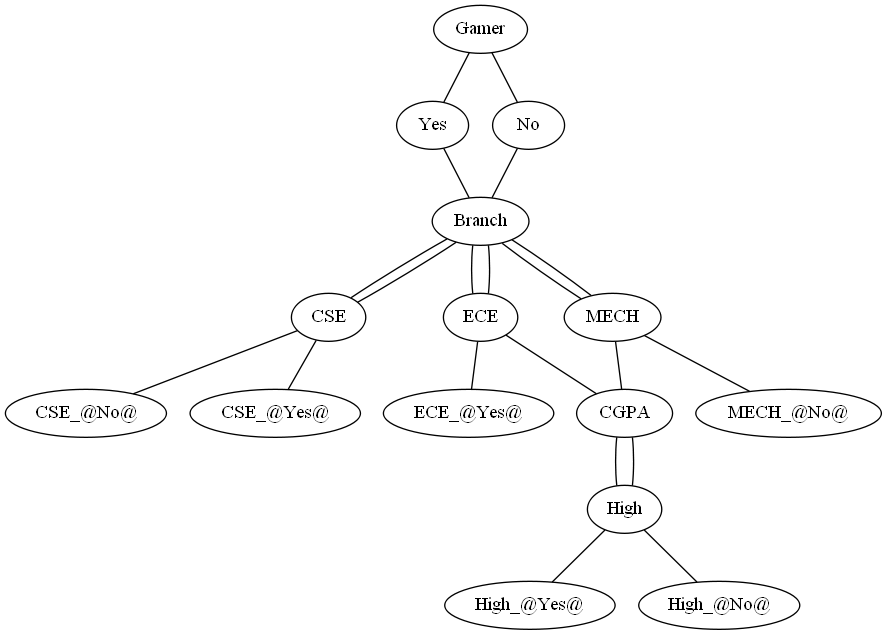

# Checking Model Accuracy

In [14]:
dataSet=pd.read_csv("dataset.csv")

def dfs(i,dictionary=finalDict,dataSet=dataSet):
    try:
        key=list(dictionary.keys())
        ds=dataSet.loc[i,key]
        value=list(dictionary.values())
        return dfs(i,dictionary[key[0]][ds[0]],dataSet)
    except Exception as e:
    
        value=dictionary[key[0]][ds[0]] 
        return value
    
    

output=[]
for i in range(len(dataSet)):
    var=dfs(i,finalDict,dataSet)
    output.append(var)

output
def dicToStr(i):
    try:
        o=i.values()
        return dicToStr(o)
    except:
        return i
    
Foutput=[]
for i in output:
    if type(i)==str:
        Foutput.append(i)
        pass
    else:
        if type(i)==dict:
            aa=dicToStr(i)
            Foutput.append(list(list(aa)[0].values())[0])
loop=0
counter=0
for last in dataSet[[i for i in dataSet][-1]]:
    if last==Foutput[loop][1:-1]:
        counter+=1
    loop+=1
print("#######\n","------- Model Accuracy Is",(counter/len(dataSet))*100,"% -------","\n#######")

#######
 ------- Model Accuracy Is 66.66666666666666 % ------- 
#######
